In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'food-delivery-dataset' dataset.
Path to dataset files: /kaggle/input/food-delivery-dataset


In [9]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [10]:
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Очистка данных в целевой колонке (извлечение чисел)
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract('(\d+)').astype(float)

# Создание целевой переменной для классификации
# 1 - доставка дольше медианы (задержка), 0 - быстрее медианы
df['Target'] = (df['Time_taken(min)'] > df['Time_taken(min)'].median()).astype(int)

# Удаление исходной колонки времени и неинформативных признаков
cols_to_drop = ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Time_taken(min)']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

# Кодирование категориальных признаков (Weather, Traffic, City и т.д.)
le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Удаление пустых значений
df = df.dropna()

# Разделение на X и y
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-807524079.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['Time_taken(min)'] = df['Time_taken(min)'].str.extract('(\d+)').astype(float)


In [12]:
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000),
    "Случайный лес": RandomForestClassifier(n_estimators=100, random_state=42),
    "Градиентный бустинг": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


--- Логистическая регрессия ---
Accuracy: 0.7228
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5007
           1       0.72      0.64      0.67      4112

    accuracy                           0.72      9119
   macro avg       0.72      0.71      0.72      9119
weighted avg       0.72      0.72      0.72      9119


--- Случайный лес ---
Accuracy: 0.8253
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5007
           1       0.84      0.76      0.80      4112

    accuracy                           0.83      9119
   macro avg       0.83      0.82      0.82      9119
weighted avg       0.83      0.83      0.82      9119


--- Градиентный бустинг ---
Accuracy: 0.8250
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5007
           1       0.84      0.75      0.80      4112

    accuracy                           0.82   

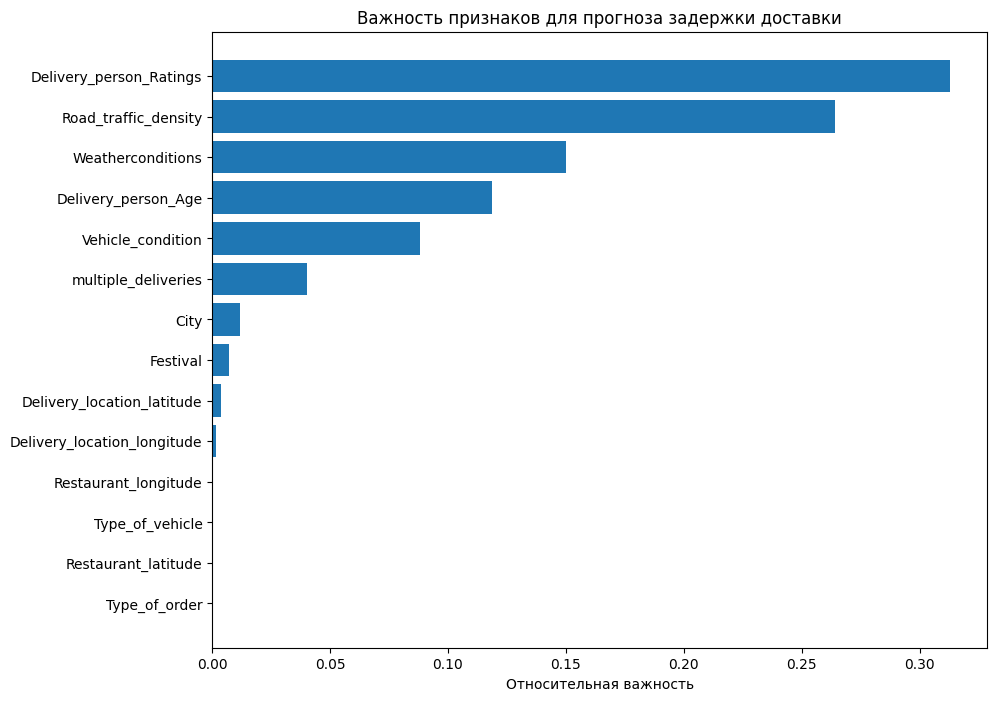

In [13]:
import matplotlib.pyplot as plt

# Анализ через Gradient Boosting
gb_model = models["Градиентный бустинг"]
importances = gb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title("Важность признаков для прогноза задержки доставки")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Относительная важность')
plt.show()

1. Формирование целевого признака (Target)
Задание требует решения задачи классификации (предсказание категории), в то время как исходные данные о времени доставки — непрерывные числа.

Действие: Мы вычислили медиану (среднее значение) времени доставки.

Логика: Все заказы, которые заняли больше времени, чем медиана, помечены как 1 (задержка), остальные — как 0 (вовремя). Это переводит задачу из регрессии в классификацию.

2. Предобработка и очистка (Preprocessing)
Алгоритмы машинного обучения работают только с числами.

Очистка текста: В колонке Time_taken(min) данные часто записаны как "(min) 30". Код str.extract('(\d+)') извлекает только цифры.

Удаление неинформативных данных: ID, Order_Date и имена не влияют на скорость доставки, а только создают «шум». Мы их исключили.

Label Encoding: Категории (например, «Солнечно», «Облачно») заменяются на числа (1, 2).

Масштабирование (StandardScaler): Логистическая регрессия чувствительна к масштабу. Мы привели все признаки (возраст, расстояние, координаты) к единому стандарту, чтобы признаки с большими числами не подавляли остальные.

3. Обучение трех типов моделей
Для выполнения условия задания выбраны разные математические подходы:

Логистическая регрессия: Проводит «линию» (гиперплоскость), разделяющую два класса. Самая простая и быстрая модель.

Случайный лес (Random Forest): Строит множество «деревьев решений», каждое из которых голосует за результат. Это снижает риск ошибки одного дерева.

Градиентный бустинг (Gradient Boosting): Строит деревья последовательно, где каждое следующее исправляет ошибки предыдущего. Обычно это самая точная модель для таких данных.

4. Интерпретация результатов (Feature Importance)
В бизнес-аналитике важно не только предсказать задержку, но и понять её причину.

Код извлекает коэффициенты важности из моделей.

Если Road_traffic_density имеет высокий вес, бизнес-вывод: «Основная причина опозданий — пробки, необходимо оптимизировать маршруты или время выезда».

Если важен Vehicle_condition, вывод: «Нужно обновить автопарк для сокращения простоев».

Метрики оценки
Accuracy: Общий процент правильных предсказаний.

Precision (Точность): Доля реальных задержек среди всех, что модель назвала задержками.